# COGS 118A - Final Project

# Predicting K-Complexes and Spindles 

## Group members

- Satomi Ito
- Pudan Xu 
- Joakim Nguyen
- Wilson Tan
- Boyong Liu

# Abstract 

Manual labeling is a tedious and time consuming task. By automating labeling, it would free up and allow for a more efficient use of time. In the case of sleep EEG recordings, k-complexes and sleep spindles are often labeled because of their importance in studying brain activity in sleep. This project looks at automating the labeling of these k-complexes and spindles. The data in this project consists of k-complex, spindles, and a neither class, where each data point is represented using mV recording over time. To automate labeling, we used this data to train multiple supervised machine learning algorithms, convolutional neural networks, K-nearest neighbors, and support vector machines, in an attempt to classify the three classes. Results were measured using the typical accuracy metric. The number of correct classifications divided by the total number of classifications. These results show that classification of k-complexes, spindles, and neithers may require a powerful model in order to achieve high accuracies and automated labeling of these classes may require large amounts of resources such as viable data, computational power, and more, in order to accomplish.

# Background

This study consists of thirty brains and over hundred thousands of data. Before we dive into the technicals of predicting the k complex and spindle, we need to understand how the mind works when people go to sleep. There are four stages of sleep. When a person goes to sleep, bursts of neural oscillatory activity happens, which is the pattern of neural activityin the central nervous system. Stages 1 to 3 are called non-rapid eye movement (NREM) sleep, also known as quiet sleep. Stage 4 is rapid eye movement (REM) sleep, also known as active sleep or paradoxical sleep [1].

In order to better analyze the brain activity in sleep, scientists use electroencephalogram (EEG), a non-invasive test that records brain activity. There are 2 hallmarks of non-rapid eye movement (NREM) - 2 sleep stage: the large multicomponent K-complex (KC) and the rhythmic spindle. Both of them can be seen on electroencephalography (EEG) [2].

According to a clinical psychologist, John Cline, “K complexes are large waves that stand out from the background and often occur in response to environmental stimuli such as sounds in the bedroom. Sleep spindles are brief bursts of fast activity that appear something like the shape of an "eye" as they rapidly increase in amplitude and then rapidly decay.” [3]

Manual data labeling can take large amounts of time since it requires human perusal of large amounts of data. "Manual data labeling has the potential to be somewhat labour intensive. Each instance of labeling may take seconds but the multiplicative effect of thousands of images could create a backlog and impede a project." [4] Because of this issue, automation of image labeling is highly important as it can save time and energy as well as create a smooth and efficient workflow.  

# Problem Statement

Manually labeling data is laborious and time consuming, so automated labeling would allow for more efficient time usage. In the case of sleep wave recordings done by an EEG, K-complexes and spindles are often labeled because they're important patterns that provide valuable information about brain activity. In this project, we looked at a multiclass classification problem, in sleep wave recordings from an EEG in an attempt to correctly classify these patterns using supervised machine learning models. These classes being k-complex, spindle, or neither. By training models to classify these patterns, we're able to easily identify these different classes by presenting chunks of wave recordings at a time. By autonomously classifying these k-comploxes and spindles within wave recordings, it solves the issue of manual labeling k-complexs and spindles which in turn allows for more efficient use of time and resources. 

# Data
- https://github.com/nmningmei/Get_Sleep_data
- Dataset shape: (327204, 128) + (327204,) for the class labels
- Observations: EEG epochs that are 1250ms long (1.25s)
- Variables: 128 evenly spaced microvolt (μV) samples across the 1250ms.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import mne

In [2]:
path_raw_EEG = os.getcwd() + '/EEG'

# Pick a participant
participant = 1

participant_vhdr = os.listdir(path_raw_EEG)[3*participant-2]
participant_vhdr

'suj11_l2nap_day2.vhdr'

In [3]:
raw = mne.io.read_raw_brainvision(path_raw_EEG + '/' + participant_vhdr, preload=True)
raw.info

Extracting parameters from c:\Users\khngu\Documents\asdf/EEG/suj11_l2nap_day2.vhdr...
Setting channel info structure...
Reading 0 ... 1806049  =      0.000 ...  1806.049 secs...


<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, Fz, F3, F7, FT9, FC5, FC1, C3, T7, CP5, CP1, Pz, P3, P7, ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: 2015-10-15 12:26:35 UTC
 nchan: 64
 projs: []
 sfreq: 1000.0 Hz
>

Using matplotlib as 2D backend.


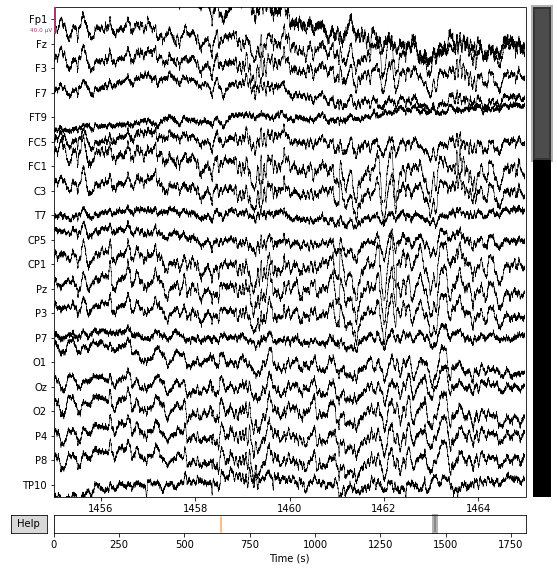

In [4]:
raw.plot(start=1455);

Perform a highpass and lowpass filter of 1-30Hz. EEG Experts tend to read this bandpass for sleep patients. We ignore Notch filter because author of data doesn't perform notch filter either.

Setting up band-pass filter from 1 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 30.00 Hz: -6.02, -6.02 dB



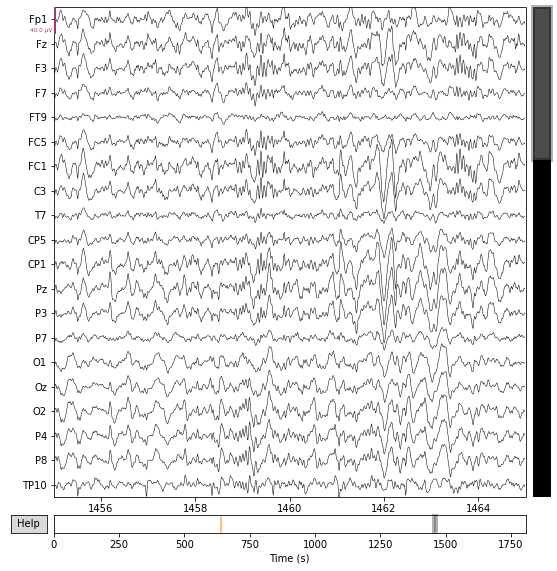

In [5]:
raw.plot(start=1455, highpass=1, lowpass=30);

# Proposed Solution

As a baseline model, we will be using K-Nearest Neighbors (KNN) with the default sklearn settings. We chose KNN because it has fairly good predictive power and the results we get from model are easily explainable. Also we believe we have enough data to overcome the curse of dimensionality.

Another model we'll be using is a Support Vector Machine (SVM) and because SVMs are binary classifiers, we can use a One vs One. SVMs also don't have a probability or confidence that can be compared and so we are unable to use One vs Rest, however, with only 3 classes, the number of classifiers we need for One vs One is only 3. We will also experiment with different parameters such as, how much we care about the loss metric, whether we want to use a linear, polynomial, or radial kernel, degree and gamma values if appropriate.

In addition to this, we'll use a Convolutional Neural Network (CNN). CNNs allow for automatic feature detections through a series of convolution and pooling operations which make them an appropriate model for classification. Since k-complexes, spindles, and neither all contain unique features to them, for example a k-complexes unique peak and trough or a spindles high burst of activity, an ideal CNN would detect these unique features and categorize them appropriately. In addition to this, we believe we have large enough data to train a CNN as well.

We have large amounts of data, so we can choose to use a simple train and test or we can implement a K-Fold Cross-Validation.

# Evaluation Metrics

This project looks at binary classification, so, we can use the typical binary classification loss which is the proportion of data points labeled correctly. In this case it would be the proportion of K-complex and Spindles labeled correctly. This would simply be the number of images labeled correctly divided by the number of images. $$ e = \frac{1}{n}\sum_{i=1}^{n} 1(y_i \neq f(x_i; W)) $$
However, this loss has an infinite gradient when going from correct to incorrect decision and zero gradient everywhere else which makes it very hard to minimize. Therefore, it may be best to only use this as a baseline.

Another common classification metric would be to maximize the area under the ROC curve. By maximizing the area under the ROC curve. Because area under the curve corresponds to how good the model is, maximizing ROC-AUC could be another potential metric evaluation. We considered the ROC as a potential metric because it would give use the opportunity to visualize thresholds and the proportion of false negatives to false positives the model makes.

# Results


### Subsection 1: Data

Our data consists of k-complex, sleep spindle, and neither wave patterns. We can first visualize our data.

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split, learning_curve
from sklearn.metrics import accuracy_score

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import layers, models

In [4]:
data    = np.load("./dataset_1-30.npy")
labels  = np.load("./dataset_labels_1-30.npy")

combine = np.hstack((data, labels))

comp       = combine[combine[:,-1] ==-1]
spind      = combine[combine[:,-1] == 1]
neither    = combine[combine[:,-1] == 0]

comp_size    = comp.shape[0]
spind_size   = spind.shape[0]
neither_size = neither.shape[0]

sample_cap = min([comp_size, neither_size, spind_size])

combine = np.concatenate((comp[:sample_cap],
                          spind[:sample_cap],  
                          neither[:sample_cap]),
                          axis=0)

X, y = np.split(combine, [-1], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

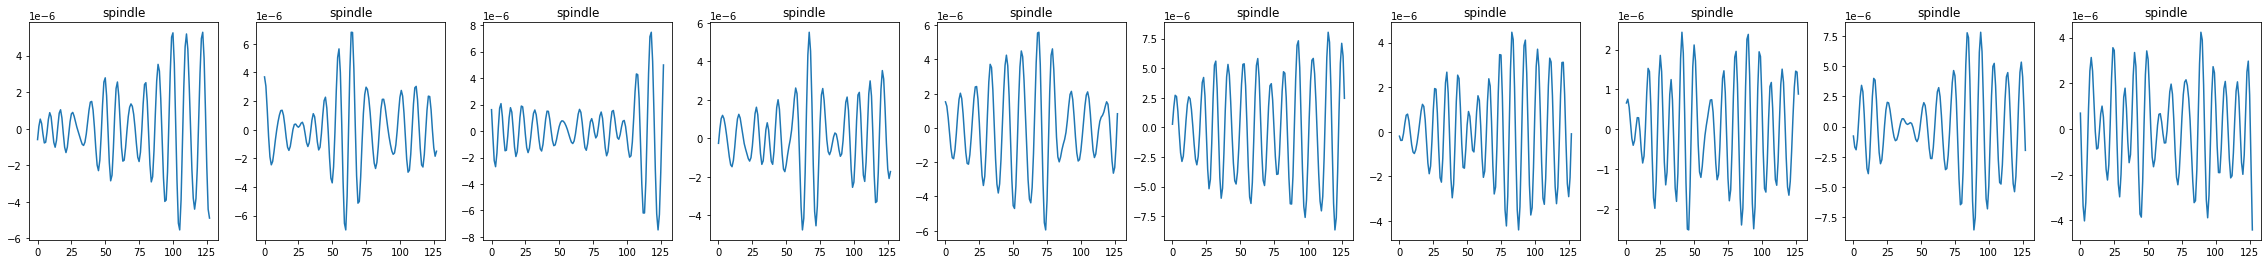

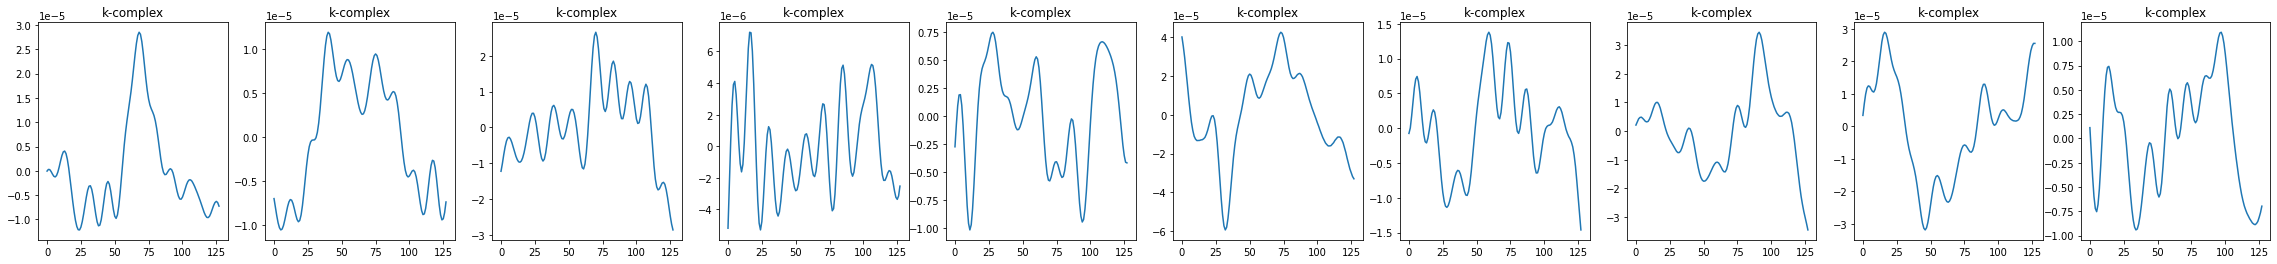

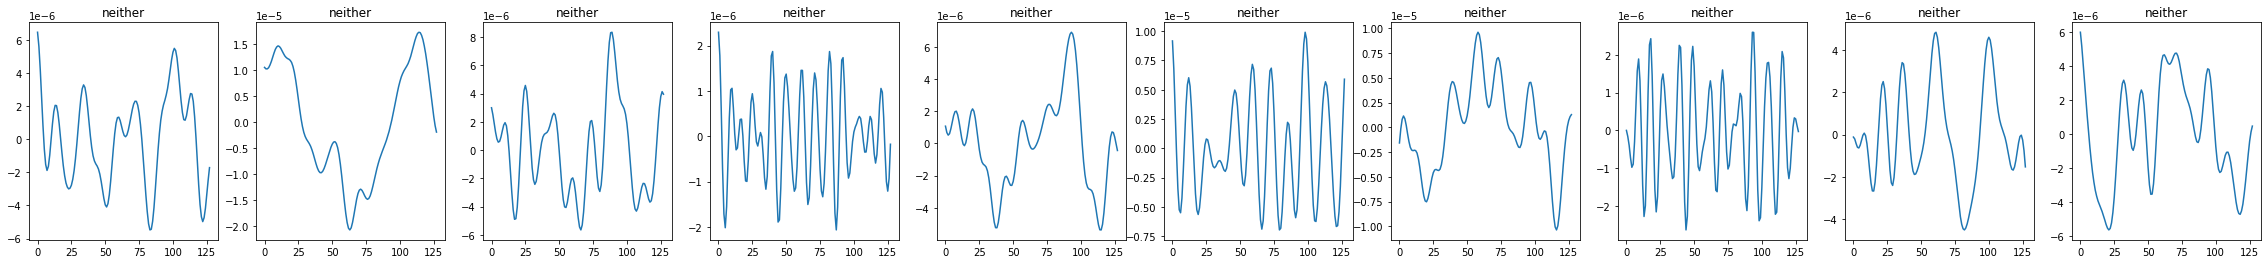

In [20]:
first_idx = 0
samps = 10
for label in [-1, 1, 0]:
    last_idx = y[y == label].shape[0] + first_idx
    idx = [np.random.randint(first_idx, last_idx) for _ in range(samps)]
    first_idx = last_idx
    fig, axs = plt.subplots(1, samps, figsize=(20+2*samps, 4))
    if label == -1:
        label_str = 'spindle'
    elif label == 0:
        label_str = 'neither'
    elif label == 1:
        label_str = 'k-complex'
    for i, ax in zip(idx, axs):
        ax.plot(np.arange(128), X[i]);
        ax.set_title(label_str);

When visualizing the data, we can see some distinct features of k-complexes, spindles, and neither. For example, the k-complexes can be identified by their unique rise and falls in mV and spindles can be identified by their burst in activity. One possible approach we could take would be to use a convolutional neural network. Ideally, it would be able to autonomously detect these features and classify them accordingly.

Although there are high dimensions, another method that could work would be K-nearest neighbors. This is because (1) we have a lot of data so this will help fight the effects of "curse of dimensionality" and (2) because of the unique shapes of k-complexes, spindles, and neither, the values for each dimension will hopefully differ enough where KNN can provide decent classification. 

Lastly, we can use support vector machines with the kernel trick because of high dimensionality. Although K-nearest-neighbors might be able to perform well, there's also a good chance that it may not due to the high dimensions. Therefore, we can also use support vector machines which works well with high dimensions due to their use of support vectors.

### Subsection 2: Base Model

As the baseline model, we can use the default K-Nearest neighbors model from sklearn.

In [21]:
model = KNeighborsClassifier()

model.fit(X_train, np.ravel(y_train))
model.score(X_test, y_test)

0.8817629517123858

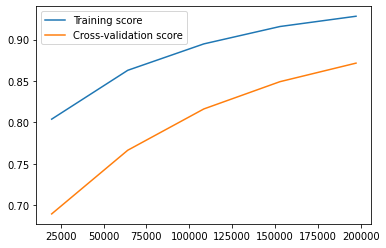

In [22]:
train_sizes, train_scores, valid_scores = learning_curve(model, X_train, np.ravel(y_train), cv=10)

plt.plot(train_sizes,np.mean(train_scores,axis=1), label="Training score")
plt.plot(train_sizes,np.mean(valid_scores,axis=1), label="Cross-validation score")
plt.legend()
plt.show()

### Subsection 3: Hyperparameter/Model Selection

We can begin tuning and creating more complex models to determine how well these different models will perform. In addition to K-nearest neighbors, we'll also take a look at two models that should have higher predictive power, support vector machines and convolutional neural networks.

#### K-Nearest Neighbors

Hyperparameter selection for a K-nearest neighbors model with the typical accuracy metric. 

In [23]:
model = KNeighborsClassifier()
param_grid = {
    'KNN__algorithm': ["ball_tree", "kd_tree"],
    'KNN__leaf_size': [3, 15, 30],
    'KNN__n_neighbors': [3, 5],
    'KNN__weights': ["uniform"],
    'KNN__p': [1, 2],
}
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
pipe = Pipeline(steps=[("imputer", imp), ("KNN", model)])
print(pipe.get_params())

grid = GridSearchCV(pipe, param_grid, scoring='accuracy', cv=5, verbose=0)

iters = int(X_train.shape[0] / 1000)

for i in range(iters):
    # print(f"Iteration {i+1} out of {iters}: ")
    grid.fit(np.squeeze(X_train[i*1000:i*1000 + 1000]), np.squeeze(y_train[i*1000:i*1000 + 1000]))

print(grid.cv_results_)

{'memory': None, 'steps': [('imputer', SimpleImputer()), ('KNN', KNeighborsClassifier())], 'verbose': False, 'imputer': SimpleImputer(), 'KNN': KNeighborsClassifier(), 'imputer__add_indicator': False, 'imputer__copy': True, 'imputer__fill_value': None, 'imputer__missing_values': nan, 'imputer__strategy': 'mean', 'imputer__verbose': 0, 'KNN__algorithm': 'auto', 'KNN__leaf_size': 30, 'KNN__metric': 'minkowski', 'KNN__metric_params': None, 'KNN__n_jobs': None, 'KNN__n_neighbors': 5, 'KNN__p': 2, 'KNN__weights': 'uniform'}
{'mean_fit_time': array([0.0114707 , 0.01389027, 0.01175914, 0.01076479, 0.00777497,
       0.00777831, 0.00833125, 0.00757504, 0.00717597, 0.00717812,
       0.00657701, 0.00657825, 0.01734128, 0.01893859, 0.01753936,
       0.01896553, 0.01116281, 0.01275187, 0.01196065, 0.0113627 ,
       0.00995984, 0.01015892, 0.0099546 , 0.01036334]), 'std_fit_time': array([0.00061528, 0.0026061 , 0.00074619, 0.00074468, 0.00074448,
       0.00074742, 0.00103455, 0.00048842, 0.0007

In [24]:
print(grid.best_estimator_)
total = 0
iters = int(X_test.shape[0] / 10000)
for i in range(iters):
    # print(f"Iteration {i+1} of {iters}: ")
    total += accuracy_score(y_test[i*10000:i*10000 + 10000], grid.predict(np.squeeze(X_test[i*10000:i*10000 + 10000])))
    
print(f"Mean accuracy: {total/iters}")

Pipeline(steps=[('imputer', SimpleImputer()),
                ('KNN',
                 KNeighborsClassifier(algorithm='ball_tree', leaf_size=3))])
Mean accuracy: 0.6136299999999999


In [5]:
model = KNeighborsClassifier()
param_grid = {
    'KNN__algorithm': ["ball_tree", "kd_tree"],
    'KNN__leaf_size': [3, 15],
    'KNN__n_neighbors': [3, 5],
    'KNN__weights': ["uniform"],
    'KNN__p': [1, 2],
}
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
pipe = Pipeline(steps=[("imputer", imp), ("KNN", model)])

grid = GridSearchCV(pipe, param_grid, scoring='accuracy', cv=2, verbose=0, n_jobs=7)

grid.fit(np.squeeze(X_train), np.squeeze(y_train))

print(grid.cv_results_)

{'mean_fit_time': array([ 7.73538959,  7.73239982,  7.69776893,  8.56404495,  9.71231997,
       11.47660208, 12.30662072,  8.95774913, 11.84457862, 11.03450656,
        9.00417924,  8.34935534,  6.58057868,  7.76519859,  8.34893882,
        9.212219  ]), 'std_fit_time': array([0.01809084, 0.02207816, 0.13795376, 0.86637664, 0.36805141,
       0.18923354, 0.2374543 , 0.33427453, 1.08997929, 0.15998816,
       0.49722648, 0.2401005 , 0.379161  , 0.76415145, 0.27495778,
       0.10747457]), 'mean_score_time': array([4972.90803623, 5209.2131325 , 5264.14668357, 5340.4857384 ,
       5837.27951252, 5858.79234445, 5809.12824512, 5149.25073671,
       4521.21954978, 6072.47374165, 5064.0971781 , 7614.15671432,
       4994.75713134, 4816.32659435, 4892.56200385, 4340.25253916]), 'std_score_time': array([ 76.19677806,  97.2783643 ,  90.35654318, 102.74141014,
        55.35802019,  61.46185315,  67.41766977, 142.25872064,
        48.04002678,  70.4861635 , 156.40572751,  82.99250662,
        86

In [6]:
print(grid.best_estimator_)

acc = accuracy_score(y_test, grid.predict(np.squeeze(X_test)))
    
print(f"Accuracy: {acc}")

Pipeline(steps=[('imputer', SimpleImputer()),
                ('KNN',
                 KNeighborsClassifier(algorithm='ball_tree', leaf_size=3,
                                      n_neighbors=3))])
Accuracy: 0.9028876252569968


### Convolutional Neural Network

Hyperparameter selection for a convolutional neural network using the typical accuracy metrics

In [25]:
def build_cnn(v_activation="relu", v_optimizer="adam"):
    cnn = models.Sequential()
    cnn.add(layers.Conv1D(32, 2, activation=v_activation, input_shape=(X_train[0].shape[0], 1)))
    cnn.add(layers.MaxPooling1D(3))
    cnn.add(layers.Conv1D(16, 2, activation=v_activation))
    cnn.add(layers.MaxPooling1D(3))
    cnn.add(layers.Conv1D(16, 2, activation=v_activation))
    cnn.add(layers.MaxPooling1D(3))
    cnn.add(layers.Flatten())
    cnn.add(layers.Dense(64, kernel_regularizer = "l1_l2", activation=v_activation))
    cnn.add(layers.Dense(128, kernel_regularizer = "l1_l2", activation=v_activation))
    cnn.add(layers.Dense(128, kernel_regularizer = "l1_l2", activation=v_activation))
    cnn.add(layers.Dense(128, kernel_regularizer = "l1_l2", activation=v_activation))
    cnn.add(layers.Dense(128, kernel_regularizer = "l1_l2", activation=v_activation))
    cnn.add(layers.Dense(128, kernel_regularizer = "l1_l2", activation=v_activation))
    cnn.add(layers.Dense(128, kernel_regularizer = "l1_l2", activation=v_activation))
    cnn.add(layers.Dense(128, kernel_regularizer = "l1_l2", activation=v_activation))
    cnn.add(layers.Dense(3))
    cnn.compile(optimizer=v_optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])
    return cnn

In [26]:
# Define parameter grid
activations = ["tanh", "relu", "sigmoid"]
optimizers = ["sgd", "adam", tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.975, beta_2=0.9995)]
batch_size = [16, 32, 64]
params = dict(
    v_activation = activations,
    v_optimizer= optimizers,
    batch_size = batch_size
)

cnn = build_cnn()
cnn.summary()

# Use sklearn wrapper to use randomized search grid
model = KerasClassifier(build_fn=build_cnn, epochs=1, batch_size=16, verbose=0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 127, 32)           96        
                                                                 
 max_pooling1d (MaxPooling1D  (None, 42, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 41, 16)            1040      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 13, 16)           0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 12, 16)            528       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 4, 16)            0

C:\Users\khngu\AppData\Local\Temp\ipykernel_31488\1987837627.py:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=build_cnn, epochs=1, batch_size=16, verbose=0)


In [27]:
gscv = GridSearchCV(model, params, cv=2, verbose=0)
gscv.fit(X_train, y_train)
print(gscv.cv_results_)

{'mean_fit_time': array([23.83663654, 27.27648246, 27.00033498, 22.62189043, 27.43191195,
       26.8501718 , 25.14408827, 28.58148432, 28.71662223, 15.68038678,
       17.98387885, 17.9468987 , 15.25552249, 17.48649085, 17.62453878,
       16.69359672, 18.68885708, 18.6378535 , 11.54455698, 12.26019907,
       12.51281786, 11.53524125, 12.08638811, 12.5001334 ,  9.74697196,
        9.19842255,  9.41167521]), 'std_fit_time': array([0.77262402, 0.39347112, 0.01922035, 0.06890666, 0.02208233,
       0.46829486, 0.07584548, 0.32641506, 0.12087953, 0.13720727,
       0.06576037, 0.01576996, 0.05773497, 0.17397964, 0.13756454,
       0.24418056, 0.32520127, 0.16281879, 0.46501577, 0.16587567,
       0.12592793, 0.22177398, 0.09776521, 0.12333953, 2.55553901,
       0.0231868 , 0.14916635]), 'mean_score_time': array([6.91392291, 6.99026239, 6.97517562, 6.80401719, 6.52121651,
       6.54254448, 7.52918971, 7.4924264 , 7.51502049, 4.38827288,
       4.48373425, 4.45128226, 4.299178  , 4.09366

In [28]:
pred = gscv.predict(X_test)
print("Accuracy of the best model: ")
print(accuracy_score(y_test, pred))

print("Best model: ")
print(gscv.best_estimator_)

print("Prediction: ")
print(pred)
print(np.unique(pred, return_counts=True))
print("True: ")
print(np.ravel(y_test))

3375/3375 [==============================] - 4s 1ms/step
Accuracy of the best model: 
0.3337531719424327
Best model: 
Prediction: 
[0. 0. 0. ... 0. 0. 0.]
(array([0.]), array([107978], dtype=int64))
True: 
[ 1. -1. -1. ...  0. -1.  0.]


### Support Vector Machine

In [29]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [30]:
svc = svm.SVC()
grid = GridSearchCV(estimator=svc, param_grid={'C': [0.01, 0.1, 1, 5, 10], 'kernel': ('linear', 'rbf')})

In [32]:
iters = int(X_train.shape[0] / 1000)

for i in range(iters):
    # print(f"Iteration {i+1} out of {iters}: ")
    grid.fit(np.squeeze(X_train[i*1000:i*1000 + 1000]), np.squeeze(y_train[i*1000:i*1000 + 1000]))

In [33]:
pred = grid.predict(X_test)
print(accuracy_score(y_test, pred))

0.6309618626016411


### Subsection 4: Learning Curves

Now, we can take a look at performance across all models to determine whether the models with higher predictive power were able to outperform our tuned K-nearest neighbors model

Learning curve for the Convolutional Neural Network

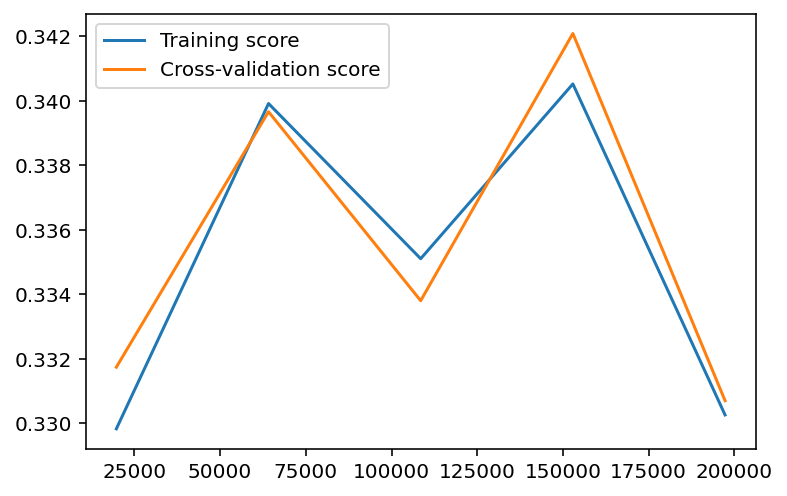

In [34]:
train_sizes, train_scores, valid_scores = learning_curve(model, X_train, np.ravel(y_train), cv=10)

plt.plot(train_sizes,np.mean(train_scores,axis=1), label="Training score")
plt.plot(train_sizes,np.mean(valid_scores,axis=1), label="Cross-validation score")
plt.legend()
plt.show()

Learning curve for best SVM

In [36]:
train_sizes, train_scores, valid_scores = learning_curve(grid.best_estimator_[1], X_train, np.ravel(y_train), cv=10)

plt.plot(train_sizes,np.mean(train_scores,axis=1), label="Training score")
plt.plot(train_sizes,np.mean(valid_scores,axis=1), label="Cross-validation score")
plt.legend()
plt.show()

### Subsection 5: Other

Other KNN, CNN, and Multilayered Perceptron (MLP) models were also explored using gird search, random search, and cross validation to tune hyperparameters for these different models. Results showed approximately 80% testing accuracy for the best KNN model when trained using the accuracy metric, approximately 70% testing accuracy for the best KNN when trained using the ROC AUC metric, and 40% testing accuracy for CNN and MLP models. However, this was all done using a smaller dataset consisting of only around 1000 data points which is nowhere near enough data to properly train a CNN or MLP. The 40% was achieved because they were only predicting one class. This showed how although some models have more predictive power than others, there are practical limitations, such as data limitation, that affect what the "best" model is.

# Discussion

### Interpreting the result

When looking at a problem, one thing to consider is how difficult the problem is. To determine the difficulty of automated labeling of k-complexes, spindles, and neithers, we looked at the performance of different models with varying levels of theoretical performance of KNNs, SVMs, and CNNs. On paper, KNNs should have the lowest predictive power of the three, then SVMs, and followed by CNNs with the highest predictive power. By comparing the performance of these three models, we can get a sense of how difficult classification of k-complexes, spindles, and neither is.

From the visualization, we saw that the data contained incredibly high dimensions which could pose a problem for KNNs which suffer from the “curse of dimensionality”. However, when looking at the KNNs, they were able to achieve around 90% accuracy. This could be because we had enough data to fight the “curse of dimensionality”, or there’s just enough distinction between the different classes which allow for easier classification, or both.

Since a KNNs performance can achieve around 90% accuracy, this could mean that there’s no need for an extremely deep CNN. However, when looking at simple CNNs, they were unable to learn from the data which could be indicative of it being too simple to learn the data. 

When looking at SVMs, they were also unable to learn the data but this may be due to how the data was fit. However, because KNNs perform well on this task, it shows that automated classification of waveforms may not require extremely high predictive power models to solve. But, it may still be beneficial to look into higher predictive power models.

### Limitations

Originally, our dataset consisted of 500000-600000 data points, but due to a data issue, only around 10000 were viable. Then, when balancing out the dataset, only 1000 data points were available which is nowhere near enough data to train a convolutional neural network. With too many similar points and only being able to use 1000 data points meant that we had a severe lack in data. More data would have been beneficial, but because of a late catch on the data similarity, we were unable to fix this in time. More data would have allowed for the neural networks to train properly and help counteract the issue of "curse of dimensionality" in the K-nearest-neighbor models.

The lack of data issue was solved and we were able to get a dataset of 528504 data points, which was balanced out to around 300000, but we were unable to perform thorough hyperparameter selection with the data for some models due to a lack of time. Instead, the KNN and CNN models were mostly designed and tuned on a smaller dataset. With more time, we would have been able to perform more thorough hyperparameter/model selections and possibly have achieved better results.

In addition to this, we also attempted to run the learning curve of the SVM and allowed it to run for over 24 hours, but due to time constraints, we felt that the learning curve would not be able to finish running within an appropriate time.

Another limitation comes from hardware and data. When working with such a large dataset, we ran into memory issues which limited the number of things we could try. This also meant that we could no longer fit the data in a single go, but had to perform many smaller partial fits. This affected the SVMs in particular and the results are likely not accurate representations of an SVMs ability for this classification task.

### Ethics & Privacy

The data used in this project come from human participants. However, this project doesn’t use any personally identifiable information nor does it require any further human participation. Also, the data used in the original EEG experiment involved informed consent and is permitted to be used non-commercially.

We did not label the data and are unable to determine whether the data was correctly labeled. One way that could help this issue would be to look at other examples of K-complexes and Spindles and compare to see whether they look similar to the corresponding labeled images. An issue with this is we would be slightly unconfident in identifying the correct labels for certain images due to a lack of expertise.

Because our data has high dimensions, there is a worry about the “curse of dimensionality”. However, we’re confident that we will still be able to get good training sets because of the abundance of data available to counteract the lower proportional representation.

One issue arises from the fact that our model will not predict with 100 percent accuracy. If the model is used for K-complex and Spindle classification, the class prediction of an image would still need to be verified by a human. The problem arises when this verification is ignored and the prediction of the model is taken as absolutely correct. Not only could this impact the results of studies, but also the waste of resources that go into those studies. Some ways to counter this would be to run classification on the images with multiple models and use the majority classification across the models which could help make more accurate predictions. We could also be transparent about our results and inform users that the model isn’t perfect and the results require verification. In the worst case scenario we will recall the entire algorithm.

### Conclusion

Knowing how difficult the problem is to begin with can make how you tackle the problem easier. The results of the KNNs, SVMs, and CNNs show that the automation of labeling k-complexes, spindles, and neither is not extremely difficult by nature but also not simple. Because KNNs have satisfactory performance in this task, there may be no need to use an extremely deep CNN even though they may produce better results than KNNs. A follow up to this could be to look at how extremely deep CNNs perform on this task.

# Footnotes
1:The 4 Stages of Sleep. What's Happening During NREM and REM Sleep

https://www.verywellhealth.com/the-four-stages-of-sleep-2795920



2:The Emergence of Spindles and K-Complexes and the Role of the Dorsal Caudal Part of the Anterior Cingulate as the Generator of K-Complexes

https://www.frontiersin.org/articles/10.3389/fnins.2019.00814/full



3:Sleep Spindles. Sleep spindles signal processes that refresh our memories.

https://www.psychologytoday.com/us/blog/sleepless-in-america/201104/sleep-spindles

4:A high-density scalp EEG dataset scquired during brief naps after a visual working memory task

https://www.sciencedirect.com/science/article/pii/S2352340918304268?via%3Dihub

5:Automated Data Labeling vs Manual Data Labeling: Optimizing Annotation

https://keymakr.com/blog/automated-data-labeling-vs-manual-data-labeling-optimizing-annotation/
